In [4]:
files = ! ls Demo/subtitles/

subs = [open('Demo/subtitles/'+item).read().decode('utf-8').split() for item in files ]


#replace('\r','').replace('\n\n','\n')
print files



['Game.of.Thrones.S06E01.HDTV.en.srt', 'Game.of.Thrones.S06E02.HDTV.en.srt', 'Game.of.Thrones.S06E03.HDTV.RMTeam.en.srt', 'Game.of.Thrones.S06E04.HDTV.en.srt', 'Game.of.Thrones.S06E05.HDTV.FUM.en.srt', 'Game.of.Thrones.S06E06.HDTV.KILLERS-AVS.en.srt', 'Game.of.Thrones.S06E07.HDTV.en.srt', 'Game.of.Thrones.S06E08.HDTV.12-06-2016.en..srt', 'Game.of.Thrones.S06E09.HDTV.en..srt', 'Game.of.Thrones.S06E10.HDTV.AVS.en..srt']


In [5]:
print len(subs)

print subs[0][80:180]

10
[u'-->', u'00:03:01,860', u'<i>(howling', u'continues)</i>', u'13', u'00:03:01,945', u'-->', u'00:03:06,081', u'<i>(Ghost', u'whimpering,', u'howling)</i>', u'14', u'00:03:06,166', u'-->', u'00:03:10,785', u'<i>-', u'(rattling', u'continues)', u'-', u'(whimpering,', u'howling', u'continue)</i>', u'15', u'00:03:25,635', u'-->', u'00:03:27,769', u'Man:', u"<i>It's", u'coming', u'from', u'the', u'courtyard.</i>', u'16', u'00:03:32,943', u'-->', u'00:03:35,276', u'-', u'<i>(Ghost', u'howling)</i>', u'-', u'Man', u'#2:', u"It's", u'the', u'Lord', u'Commander!', u'17', u'00:03:48,542', u'-->', u'00:03:50,325', u'Help', u'me', u'get', u'him', u'inside.', u'18', u'00:04:05,092', u'-->', u'00:04:07,008', u'<i>(howling', u'continues)</i>', u'19', u'00:04:14,985', u'-->', u'00:04:16,935', u'(door', u'closes)', u'20', u'00:04:45,382', u'-->', u'00:04:47,549', u'Thorne', u'did', u'this.', u'21', u'00:04:51,805', u'-->', u'00:04:55,023', u'How', u'many', u'of', u'your', u'brothers', u'do', u'you'

In [6]:
#import wordcloud
from itertools import groupby
# "chunk" our input file, delimited by blank lines
#from wordcloud import WordCloud, STOPWORDS
subs = []
wordData = dict()
import sys
sys.path.insert(0, 'Demo/')
from stopwordsSQL import stops
stops.extend(['dont','im','youre','youve','youll','youd'])
for item in files:
    with open('Demo/subtitles/'+item) as f:
        res = [list(g) for b,g in groupby(f, lambda x: bool(x.strip())) if b]


    for sub in res:
        if len(sub) >= 3: # not strictly necessary, but better safe than sorry
            wordData = dict()
            sub = [x.strip() for x in sub]
            #number, start_end, content = sub # py3 syntax
            start, end = sub[1].split(' --> ')
            for thing in sub[2:]:
                for stuff in thing.split():
                
                    stuff2 = stuff.lower()
                    # Remove punctuations and other filtering by decommenting the files
                    """
                    if '<' in stuff or '>' in stuff or len(stuff) <= 2:
                        continue
                    
                    if '@' in stuff or '#' in stuff:
                        continue
                    
                    for punct in [',',':','(',')',';','?','.','!','"',"'",'[',']','`','-','_','~',' ','\n','\t']:
                        stuff2 = stuff2.replace(punct,'')
                    
                    for nums in range(9):
                        stuff2 = stuff2.replace(str(nums),'')
                        
                    if stuff2 == '':
                        continue
                    
                    if stuff2 in stops:
                        continue
                
                    if 'dont' == stuff2:
                        print stuff2
                    """
                    wordData['episode'] = int(item.split('.')[3].split('E')[-1])
                    wordData['number'] = sub[0]
                    wordData['start'] = start
                    wordData['end'] = end                    
                    wordData['dialogue'] = stuff2.lower()
                    subs.append(wordData)
                    wordData = dict()

import pandas as pd
words = pd.DataFrame(subs)
words.sort_values(by='dialogue')

,dialogue,end,episode,number,start
35444,!t!u!s!u!b!t!i!t!u!l!o!c!o!m!,"00:40:35,475",10,376,"00:40:32,039"
14060,"""","00:48:57,450",4,659,"00:48:54,015"
20794,"""""t""u""s""u""b""t""i""t""u""l""o""c""o'm""","00:32:10,910",6,386,"00:31:56,730"
32417,"""a","00:26:25,444",9,287,"00:26:22,142"
1321,"""and","00:22:44,625",1,247,"00:22:42,041"
22549,"""as","00:07:14,143",7,56,"00:07:10,780"
28783,"""do","00:28:55,187",8,429,"00:28:52,820"
10124,"""don't","00:04:59,014",4,22,"00:04:55,313"
13521,"""he's","00:41:19,526",4,563,"00:41:17,192"
16926,"""him""?","00:31:10,174",5,431,"00:31:07,907"


In [7]:
print words.groupby(['dialogue']).count()['episode'].describe()

count    6079.000000
mean        6.086856
std        37.671106
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max      1514.000000
Name: episode, dtype: float64


In [8]:
p = words.groupby(['dialogue']).count()
print p.sort_values(by='number',ascending=False)['number']

dialogue
the           1514
you           1063
to             982
i              979
a              681
and            645
of             518
-              409
my             377
we             343
your           330
for            323
have           311
is             307
in             271
not            231
he             223
it             221
that           218
what           211
_              206
be             197
was            190
will           187
don't          180
all            180
they           175
with           175
do             175
if             170
              ... 
hands            1
hands.           1
handsome         1
hang.            1
hanging          1
hanging?         1
happened?        1
happening.       1
happens          1
happens?         1
happiness.       1
happy,           1
happy.</i>       1
hard,            1
head?            1
hardly           1
harmed,          1
harmony.         1
harshly          1
has.             1
hate.            1
hat

In [9]:
words.groupby("dialogue").filter(lambda x: len(x) > 60).groupby('dialogue').count()

,end,episode,number,start
dialogue,,,,
(,109,109,109,109
),100,100,100,100
-,409,409,409,409
_,206,206,206,206
a,681,681,681,681
about,99,99,99,99
all,180,180,180,180
an,71,71,71,71
and,645,645,645,645


In [10]:
#If you find error in installing wordcloud, install wordcloud by executing  the bash command as shown here
!export all_proxy="https://10.3.100.207:8080/"
!pip --proxy 10.3.100.207:8080 install wordcloud


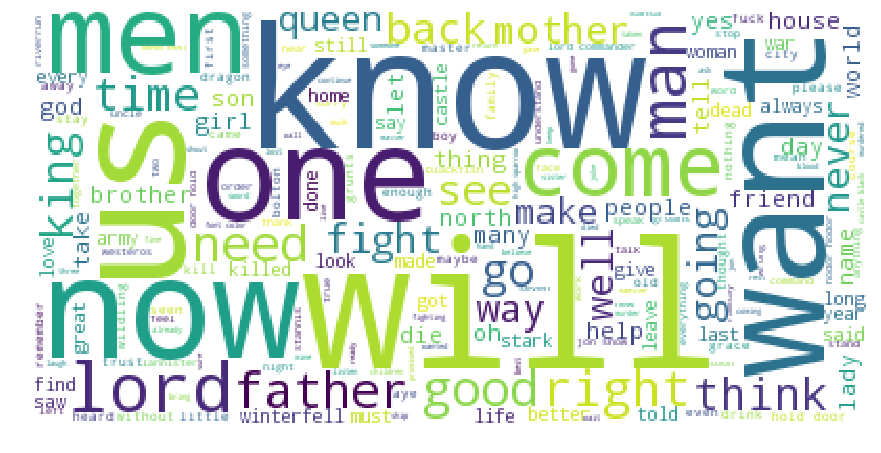

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(words['dialogue']))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
#filteredWords = words[words.groupby('dialogue')['episode'].transform('size') >= 10]
from ipywidgets import *
from IPython.display import display
from IPython.html import widgets
plt.style.use('ggplot')

NUMBER_OF_PINGS = 4

def f(Count):
    filteredWords = words.groupby("dialogue").filter(lambda x: len(x) <=Count)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(filteredWords['dialogue']))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
interact(f,Count=widgets.IntSlider(min=0,max=120,step=1,value=120))

/home/user/anaconda2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<function __main__.f>

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from IPython.html import widgets
from IPython.display import display


def newFun(Count):
    filteredWords = words.groupby("dialogue").filter(lambda x: len(x) <=Count)
    wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white',ranks_only=True).generate(" ".join(words[words['episode'] == Count]['dialogue']))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

interact(newFun,Count={'one':1,'two':2,'three':3,'four':4,'five':5,'six':6,'seven':7,'eight':8,'nine':9,'ten':10})

<function __main__.newFun>

### How to sort - IPython Magics

In [17]:
import numpy as np
from numpy import array
def bubbleSort(alist):
    for passnum in range(len(alist)-1,0,-1):
        for i in range(passnum):
            if alist[i]>alist[i+1]:
                temp = alist[i]
                alist[i] = alist[i+1]
                alist[i+1] = temp
                

def qsort(array):
    less = []
    equal = []
    greater = []

    if len(array) > 1:
        pivot = array[0]
        for x in array:
            if x < pivot:
                less.append(x)
            if x == pivot:
                equal.append(x)
            if x > pivot:
                greater.append(x)
        # Don't forget to return something!
        return qsort(less)+equal+qsort(greater)  # Just use the + operator to join lists
    # Note that you want equal ^^^^^ not pivot
    else:  # You need to hande the part at the end of the recursion - when you only have one element in your array, just return the array.
        return array

In [18]:
%timeit sorted(words['dialogue'][0:300])
%timeit bubbleSort(words['dialogue'][0:300])
%timeit qsort(words['dialogue'][0:300])

10000 loops, best of 3: 143 µs per loop
1 loop, best of 3: 713 ms per loop
100 loops, best of 3: 3.79 ms per loop


In [19]:
!pip install seaborn

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.patches as mpatches
sns.set_style("white")

plt.rcParams["axes.labelsize"] = 16.
plt.rcParams["xtick.labelsize"] = 14.
plt.rcParams["ytick.labelsize"] = 14.
plt.rcParams["legend.fontsize"] = 11.

battles = pd.read_csv("Demo/battles.csv")
character_deaths = pd.read_csv("Demo/character-deaths.csv")
character_predictions = pd.read_csv("Demo/character-predictions.csv")

battles.loc[:, "defender_count"] = (4 - battles[["defender_1", "defender_2", "defender_3", "defender_4"]].isnull().sum(axis = 1))
battles.loc[:, "attacker_count"] = (4 - battles[["attacker_1", "attacker_2", "attacker_3", "attacker_4"]].isnull().sum(axis = 1))
battles.loc[:, "att_comm_count"] = [len(x) if type(x) == list else np.nan for x in battles.attacker_commander.str.split(",")]
character_predictions.loc[:, "no_of_books"] = character_predictions[[x for x in character_predictions.columns if x.startswith("book")]].sum(axis = 1)

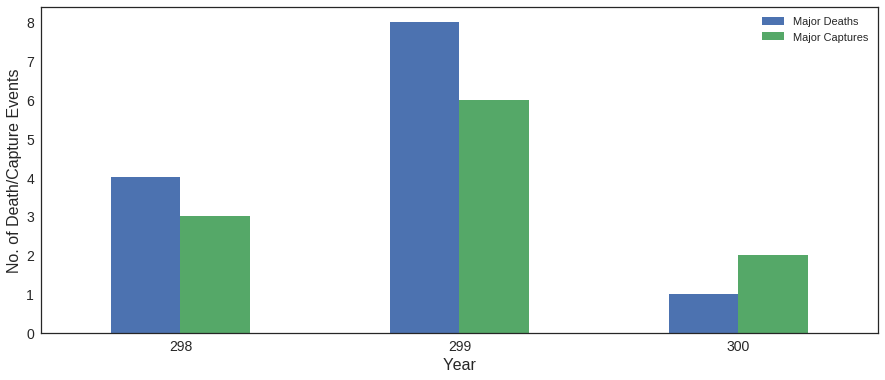

In [21]:
p = battles.groupby('year').sum()[["major_death", "major_capture"]].plot(kind = 'bar', figsize = (15, 6), rot = 0)
_ = p.set_xlabel("Year"), p.set_ylabel("No. of Death/Capture Events"), p.legend(["Major Deaths", "Major Captures"])

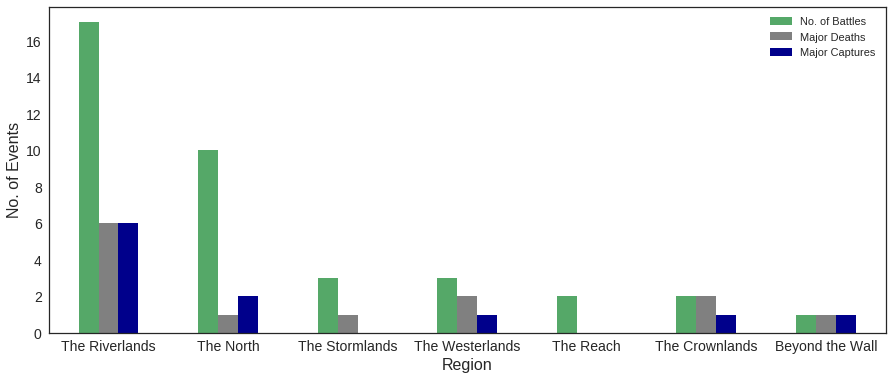

In [22]:
data = battles.groupby("region").sum()[["major_death", "major_capture"]].sort_values("major_death", ascending = False).copy(deep = True)
p = battles.region.value_counts().to_frame().merge(
    data[["major_death"]], left_index = True, right_index = True).merge(
    data[["major_capture"]], left_index = True, right_index = True).plot(
    kind = 'bar', figsize = (15, 6), color = [sns.color_palette()[1], "grey", "darkblue"], rot = 0)
_ = p.set_xlabel("Region"), p.set_ylabel("No. of Events"), p.legend(["No. of Battles", "Major Deaths", "Major Captures"])

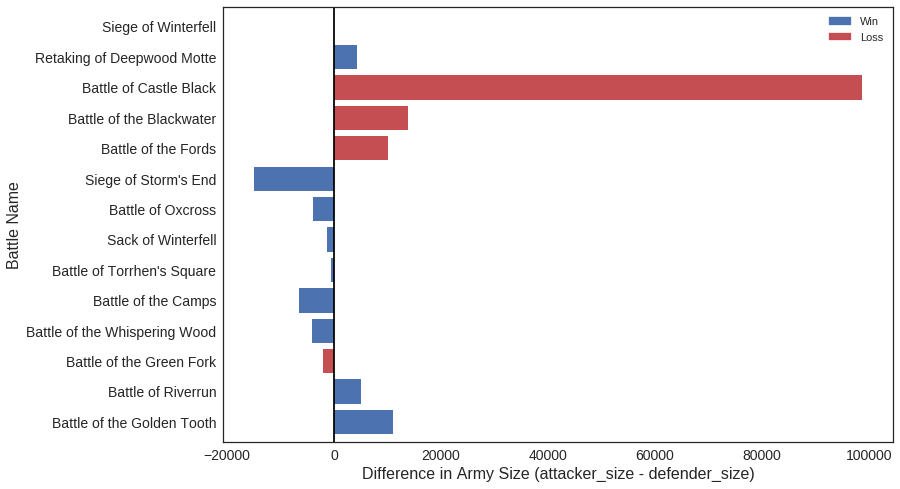

In [23]:
%matplotlib inline

data = battles.dropna(subset = ["attacker_size", "defender_size"]).copy(deep = True)
data = (data.attacker_size - data.defender_size).to_frame().merge(battles.attacker_outcome.to_frame(), left_index = True, right_index = True)
data = data[data[0] != 0]
p = data[0].plot.barh(figsize = (12, 8), width = .8, color = [sns.color_palette()[0] if x == "win" else sns.color_palette()[2] if x == "loss" else "white" for x in data.attacker_outcome.values])
plt.legend(handles = [mpatches.Patch(color = sns.color_palette()[0], label = "Win", aa = True), mpatches.Patch(color = sns.color_palette()[2], label = "Loss", aa = True)])
_ = plt.axvline(0, color = 'k'), plt.yticks(range(len(data)), battles.name.iloc[data.index].values)
_ = plt.xlabel("Difference in Army Size (attacker_size - defender_size)"), plt.ylabel("Battle Name")

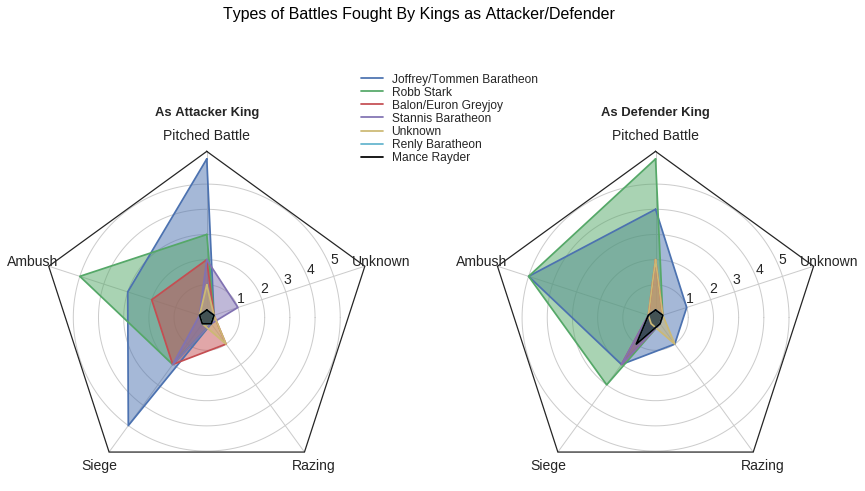

In [24]:
from matplotlib.path import Path
from matplotlib.spines import Spine
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection

%matplotlib inline
def radar_factory(num_vars, frame = "circle"):
    theta = np.linspace(0, 2 * np.pi, num_vars, endpoint = False)
    theta += np.pi / 2

    def draw_poly_patch(self):
        verts = unit_poly_verts(theta)
        return plt.Polygon(verts, closed = True, edgecolor = 'k')

    def draw_circle_patch(self):
        return plt.Circle((0.5, 0.5), 0.5)

    patch_dict = {'polygon': draw_poly_patch, 'circle': draw_circle_patch}
    if frame not in patch_dict: raise ValueError('unknown value for `frame`: %s' % frame)

    class RadarAxes(PolarAxes):
        name, RESOLUTION, draw_patch = 'radar', 1, patch_dict[frame]

        def fill(self, *args, **kwargs):
            closed = kwargs.pop("closed", True)
            return super(RadarAxes, self).fill(closed = closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            lines = super(RadarAxes, self).plot(*args, **kwargs)
            for line in lines: self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            if x[0] != x[-1]:
                x = np.concatenate((x, [x[0]]))
                y = np.concatenate((y, [y[0]]))
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            return self.draw_patch()

        def _gen_axes_spines(self):
            if frame == "circle": return PolarAxes._gen_axes_spines(self)
            spine_type, verts = "circle", unit_poly_verts(theta)
            verts.append(verts[0])
            path = Path(verts)
            spine = Spine(self, spine_type, path)
            spine.set_transform(self.transAxes)
            return {'polar': spine}
    register_projection(RadarAxes)
    return theta

def unit_poly_verts(theta):
    x0, y0, r = [0.5] * 3
    verts = [(r * np.cos(t) + x0, r * np.sin(t) + y0) for t in theta]
    return verts

kings = list(battles.attacker_king.append(battles.defender_king).fillna("Unknown").unique())
battle_types = list(battles.battle_type.fillna("Unknown").str.title().unique())

def example_data():
    data = battles[["battle_type", "attacker_king", "defender_king", "name"]].copy(deep = True).fillna("Unknown")
    data.loc[:, "battle_type"] = data.battle_type.fillna("Unknown").str.title()
    grouped, ret_data = data.groupby(["attacker_king", "battle_type"]).count()[["name"]], [battle_types]
    ret_data.append(("As Attacker King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    grouped = data.groupby(["defender_king", "battle_type"]).count()[["name"]]
    ret_data.append(("As Defender King", [[grouped.loc[(kings[j], battle_types[i])].values[0]
                                    if (kings[j], battle_types[i]) in grouped.index else 0
                                    for i in range(len(battle_types))] for j in range(len(kings))]))
    return ret_data

N = 5
theta, data = radar_factory(N, frame = "polygon"), example_data()
spoke_labels, fig = data.pop(0), plt.figure(figsize = (14, 14))
fig.subplots_adjust(wspace = 0.35, hspace = 0.20, top = 0.85, bottom = 0.05)
colors = sns.color_palette() + ["k"]
for n, (title, case_data) in enumerate(data):
    ax, _ = fig.add_subplot(2, 2, n + 1, projection = "radar"), plt.rgrids([1, 2, 3, 4, 5])
    ax.set_title(title, weight = "bold", position = (0.5, 1.1), horizontalalignment = "center", verticalalignment = "center", fontsize = 13.)
    for d, color in zip(case_data, colors):
        ax.plot(theta, d, color = color)
        ax.fill(theta, d, facecolor = color, alpha = 0.5)
    ax.set_varlabels(spoke_labels)
plt.subplot(2, 2, 1)
labels = kings
legend = plt.legend(labels, loc = (.95, .95), labelspacing = 0.1)
plt.setp(legend.get_texts(), fontsize = "large")
plt.figtext(0.5, 0.965, "Types of Battles Fought By Kings as Attacker/Defender", ha = "center", color = "k", size = 16.)
plt.show()

In [26]:
! pip install pivottablejs

In [27]:
from pivottablejs import pivot_ui
pivot_ui(battles)
